Linear Regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
Offense = pd.read_csv('Offense/clean_offense.csv')
Offense.head()

Rk  Year           Player Pos    AV       School        College  Height  \
0   1  2000    Bashir Yamini  WR   0.0         Iowa  College Stats      75   
1   2  2000     Spergon Wynn  QB   2.0  Texas State  College Stats      75   
2   3  2000   James Williams  WR   4.0     Marshall  College Stats      71   
3   4  2000  Bobbie Williams  OT  64.0     Arkansas            NaN      76   
4   5  2000    Michael Wiley  RB   4.0   Ohio State  College Stats      71   

    Wt  40YD  Vertical  BenchReps  Broad Jump  3Cone  Shuttle  \
0  191  4.53      33.0        NaN       130.0   7.09     4.18   
1  229  4.91      34.0        NaN       108.0   7.71     4.59   
2  180  4.59      36.0        NaN       123.0   7.22     4.16   
3  332  5.26      29.0       28.0        97.0   7.78     4.72   
4  193  4.50       NaN        NaN         NaN    NaN      NaN   

                Drafted  Round Draft_Outcome  
0                   NaN      8     undrafted  
1     Cleveland Browns       6       drafted  
2     Seattle Seahawks       6       drafted  
3  Philadelphia Eagles       2       drafted  
4       Dallas Cowboys       5       drafted

In [4]:
Data = Offense[["Height", "Wt", "40YD", "Vertical", "BenchReps", "Broad Jump", "3Cone", "Shuttle", "Round"]]
Data2 = Data.dropna(axis='rows')
Data2.head()

Height   Wt  40YD  Vertical  BenchReps  Broad Jump  3Cone  Shuttle  Round
3       76  332  5.26      29.0       28.0        97.0   7.78     4.72      2
10      80  326  5.22      27.5       29.0       101.0   7.68     4.68      2
11      76  305  5.28      26.0       16.0       104.0   7.99     4.73      4
14      75  318  5.37      27.0       22.0        90.0   7.91     4.84      7
16      67  204  4.60      35.0       13.0       111.0   7.14     4.14      7

In [5]:
X = Data2[["Height", "Wt", "40YD", "Vertical", "BenchReps", "Broad Jump", "3Cone", "Shuttle"]]
y = Data2["Round"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1245, 8) (1245, 1)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.19082064111960373
Testing Score: 0.1339017244530073


Text(0.5, 1.0, 'Residual Plot')

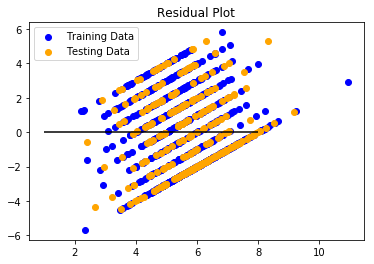

In [9]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

Quantifying Regression

In [10]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 4.760200833759055
R-squared (R2 ): 0.18136815854886945


In [14]:
model.score(X, y)

0.18136815854886945

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
model.score(X_test, y_test)

0.1339017244530073

Logical Regression


In [18]:
XOffense = Data2.drop(columns=[ "Round", ])

In [19]:
X = XOffense
y = Data2["Round"]
print(X.shape, y.shape)

(1245, 8) (1245,)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.3987138263665595
Testing Data Score: 0.3685897435897436


In [24]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [8 8 8 8 8 8 8 8 8 8]
First 10 Actual labels: [3, 8, 6, 8, 8, 4, 8, 8, 5, 8]


In [25]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

Prediction  Actual
0             8       3
1             8       8
2             8       6
3             8       8
4             8       8
5             8       4
6             8       8
7             8       8
8             8       5
9             8       8
10            1       8
11            8       8
12            8       4
13            8       3
14            8       1
15            8       8
16            8       8
17            8       6
18            8       8
19            8       1
20            8       4
21            8       8
22            8       1
23            8       1
24            8       4
25            8       7
26            8       1
27            8       8
28            2       1
29            8       8
..          ...     ...
282           8       8
283           8       6
284           8       8
285           8       5
286           8       8
287           8       8
288           8       3
289           8       4
290           2       2
291           1       3
292           8       8
293           8       4
294           8       4
295           8       4
296           8       3
297           8       4
298           8       8
299           8       8
300           8       3
301           8       8
302           8       7
303           8       7
304           8       8
305           8       6
306           8       2
307           2       5
308           8       6
309           8       8
310           8       2
311           8       8

[312 rows x 2 columns]